# Image Deblurring - June Exam

# Assignment
## Task 

The task consists of creating a deep learning model to detect hate speech or offensive language in texts. Try to build a pipeline which is able to perform the task and evaluate the results obtained. Make sure to test the model in order to prove robustness and lack of overfitting. 

The metric you will need to use to evaluate the results is the *MSE*. The metrics will be evaluated on the reconstructed images, so provide a way to check the results on a batch composed of original images and reconstructed images.

## Dataset
The dataset is built starting from *CIFAR-10* images collection. Feel free to further split the data to build a validation set, if needed. The split into different data split is left to you, perform it as you like, making sure it is meaningful.

### Dataset creation - DO NOT MODIFY

In [1]:
import tensorflow as tf 
import random
from cv2 import GaussianBlur
import numpy as np

def getDataset():
    (x_train, _), (x_test, _) = tf.keras.datasets.cifar10.load_data()
    normalize = lambda x: x/x.max()
    x_train = normalize(x_train)
    x_test = normalize(x_test)
    createBlurred = lambda arr: np.array([GaussianBlur(x, (5,5), ((random.random()*3)+1)) + (0.02*np.random.normal(0,1, (32, 32, 3))) for x in arr])
    return (createBlurred(x_train), x_train), (createBlurred(x_test), x_test)

# Solution
## Data visualization


In [2]:
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Model

In [3]:
(x_train, y_train), (x_test, y_test) = getDataset()

In [4]:
print(f'The shape of the x_train dataset is: {x_train.shape}')
print(f'The shape of the y_train dataset is: {y_train.shape}')

print(f'The shape of the x_test dataset is: {x_test.shape}')
print(f'The shape of the y_test dataset is: {y_test.shape}')

The shape of the x_train dataset is: (50000, 32, 32, 3)
The shape of the y_train dataset is: (50000, 32, 32, 3)
The shape of the x_test dataset is: (10000, 32, 32, 3)
The shape of the y_test dataset is: (10000, 32, 32, 3)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


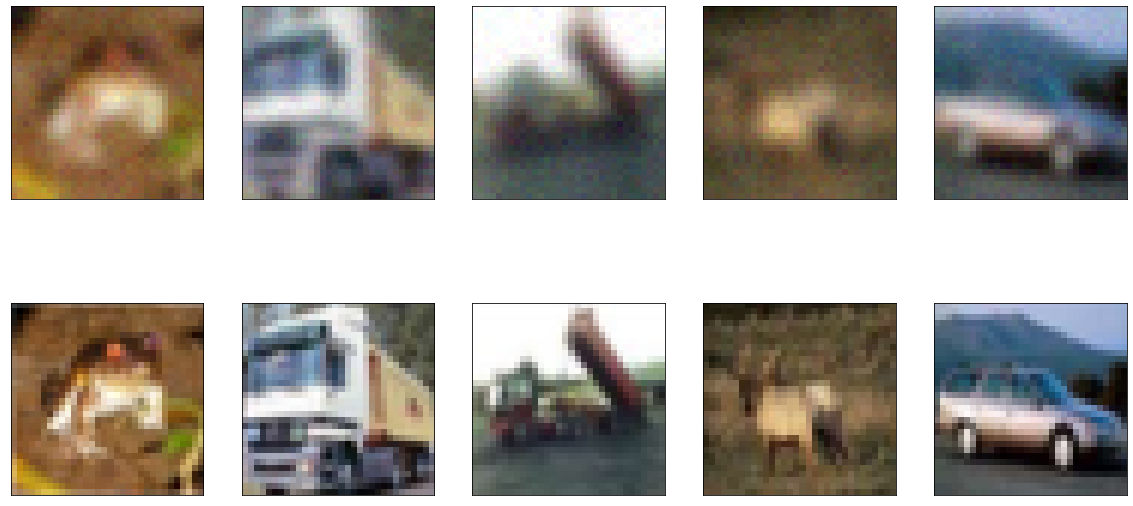

In [5]:
def plot_first_images(n_images_to_plot=5):
    plt.figure(figsize=(20, 10))
    for i in range(n_images_to_plot):
        # Display blurrd image
        ax = plt.subplot(2, n_images_to_plot, i + 1)
        plt.imshow(x_train[i], vmin=0., vmax=1.)
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

        # Display reconstructed image
        ax = plt.subplot(2, n_images_to_plot, i + 1 + n_images_to_plot)
        plt.imshow(y_train[i], vmin=0., vmax=1.)
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
    plt.show()
plot_first_images()

In [6]:
from tensorflow.keras.initializers import RandomNormal
initializer = RandomNormal(mean=0, stddev=0.01)

def build_model(input_shape):
    input_layer = layers.Input(shape=input_shape)

    x = layers.Conv2D(64, (3, 3), padding='same', kernel_initializer=initializer)(input_layer)

    bn1 = layers.BatchNormalization()(x)

    act1 = layers.Activation(activation='selu')(bn1)

    x = layers.Conv2D(64, (3, 3), padding='same', kernel_initializer=initializer)(act1)

    bn1 = layers.BatchNormalization()(x)

    act1 = layers.Activation(activation='selu')(bn1)

    encoded = layers.Conv2D(32, (3, 3), padding='same', kernel_initializer=initializer)(act1)

    bn1 = layers.BatchNormalization()(encoded)

    act1 = layers.Activation(activation='selu')(bn1)

    x = layers.Conv2D(32, (3, 3), padding='same', kernel_initializer=initializer)(act1)

    bn1 = layers.BatchNormalization()(x)

    act1 = layers.Activation(activation='selu')(bn1)

    x = layers.Conv2D(64, (3, 3), padding='same', kernel_initializer=initializer)(act1)

    bn1 = layers.BatchNormalization()(x)

    act1 = layers.Activation(activation='selu')(bn1)

    x = layers.Conv2D(64, (3, 3), padding='same', kernel_initializer=initializer)(act1)

    bn1 = layers.BatchNormalization()(x)

    act1 = layers.Activation(activation='selu')(bn1)

    decoded = layers.Conv2D(3, (3, 3), padding='same', kernel_initializer=initializer)(act1)

    output_layer = layers.Subtract()([input_layer, decoded])

    return Model(input_layer, output_layer)

autoencoder = build_model(x_train.shape[1:])

In [7]:
autoencoder.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 32, 32, 3)]  0           []                               
                                                                                                  
 conv2d (Conv2D)                (None, 32, 32, 64)   1792        ['input_1[0][0]']                
                                                                                                  
 batch_normalization (BatchNorm  (None, 32, 32, 64)  256         ['conv2d[0][0]']                 
 alization)                                                                                       
                                                                                                  
 activation (Activation)        (None, 32, 32, 64)   0           ['batch_normalization[0][0]']

In [8]:
from tensorflow.keras.initializers import RandomNormal

initializer = RandomNormal(mean=0, stddev=0.01)

def build_model(input_shape):
    input_layer = layers.Input(shape=input_shape)

    x = layers.Conv2D(64, (3, 3), padding='same', kernel_initializer=initializer)(input_layer)

    bn1 = layers.BatchNormalization()(x)

    act1 = layers.Activation(activation='selu')(bn1)

    x = layers.Conv2D(64, (3, 3), padding='same', kernel_initializer=initializer)(act1)

    bn1 = layers.BatchNormalization()(x)

    act1 = layers.Activation(activation='selu')(bn1)

    encoded = layers.Conv2D(32, (3, 3), padding='same', kernel_initializer=initializer)(act1)

    bn1 = layers.BatchNormalization()(encoded)

    act1 = layers.Activation(activation='selu')(bn1)

    x = layers.Conv2D(32, (3, 3), padding='same', kernel_initializer=initializer)(act1)

    bn1 = layers.BatchNormalization()(x)

    act1 = layers.Activation(activation='selu')(bn1)

    x = layers.Conv2D(64, (3, 3), padding='same', kernel_initializer=initializer)(act1)

    bn1 = layers.BatchNormalization()(x)

    act1 = layers.Activation(activation='selu')(bn1)

    x = layers.Conv2D(64, (3, 3), padding='same', kernel_initializer=initializer)(act1)

    bn1 = layers.BatchNormalization()(x)

    act1 = layers.Activation(activation='selu')(bn1)

    decoded = layers.Conv2D(3, (3, 3), padding='same', kernel_initializer=initializer)(act1)

    output_layer = layers.Subtract()([input_layer, decoded])

    return Model(input_layer, output_layer)

autoencoder = build_model(x_train.shape[1:])

In [9]:
autoencoder.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 32, 32, 3)]  0           []                               
                                                                                                  
 conv2d_7 (Conv2D)              (None, 32, 32, 64)   1792        ['input_2[0][0]']                
                                                                                                  
 batch_normalization_6 (BatchNo  (None, 32, 32, 64)  256         ['conv2d_7[0][0]']               
 rmalization)                                                                                     
                                                                                                  
 activation_6 (Activation)      (None, 32, 32, 64)   0           ['batch_normalization_6[0][

In [10]:
from tensorflow.keras.optimizers import Adam
adam = Adam(0.001)
autoencoder.compile(optimizer=adam, loss='mse')

In [11]:
autoencoder.fit(x_train, y_train,
                validation_split=0.2,
                epochs=20,
                batch_size=64)

Epoch 1/20
625/625 [==============================] - 30s 30ms/step - loss: 0.0058 - val_loss: 0.0049
Epoch 2/20
625/625 [==============================] - 17s 27ms/step - loss: 0.0039 - val_loss: 0.0040
Epoch 3/20
625/625 [==============================] - 17s 27ms/step - loss: 0.0036 - val_loss: 0.0036
Epoch 4/20
625/625 [==============================] - 17s 27ms/step - loss: 0.0066 - val_loss: 0.0056
Epoch 5/20
625/625 [==============================] - 17s 27ms/step - loss: 0.0045 - val_loss: 0.0042
Epoch 6/20
625/625 [==============================] - 17s 27ms/step - loss: 0.0041 - val_loss: 0.0040
Epoch 7/20
625/625 [==============================] - 17s 28ms/step - loss: 0.0040 - val_loss: 0.0039
Epoch 8/20
625/625 [==============================] - 17s 27ms/step - loss: 0.0039 - val_loss: 0.0038
Epoch 9/20
625/625 [==============================] - 17s 27ms/step - loss: 0.0038 - val_loss: 0.0038
Epoch 10/20
625/625 [==============================] - 17s 27ms/step - loss: 0.003